Install all necessary libraries

In [37]:
options(warn=-1)
install.packages("BiocManager")

BiocManager::install()
BiocManager::install(c("rhdf5", "DESeq2", "tximeta", "PoiClaClu", "glmpca", "ggbeeswarm", "apeglm", "IHW", "ReportingTools", "Gviz", "sva", "RUVSeq"))

library("rhdf5")
library("tools")
library("magrittr")
library("vsn")
library("dplyr")
library("ggplot2")
library("pheatmap")
library("RColorBrewer")
library("genefilter")
library("AnnotationDbi")
library("org.Hs.eg.db")
library("rhdf5")
library("DESeq2")
library("tximeta")
library("PoiClaClu")
library("glmpca")
library("ggbeeswarm")
library("apeglm")
library("IHW")
library("ReportingTools")
library("Gviz")
library("sva")
library("RUVSeq")


The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//Rtmp7jkp7s/downloaded_packages


Bioconductor version 3.9 (BiocManager 1.30.9), R 3.6.1 (2019-07-05)
Update old packages: 'backports', 'callr', 'covr', 'data.table', 'digest',
  'DT', 'gdtools', 'gridSVG', 'hms', 'htmlTable', 'htmltools', 'htmlwidgets',
  'IRanges', 'KernSmooth', 'knitr', 'lambda.r', 'later', 'mgcv', 'openxlsx',
  'pkgbuild', 'pkgconfig', 'promises', 'purrr', 'RcppArmadillo', 'rlang',
  'rvcheck', 'shiny', 'survival', 'testthat', 'xfun'
Bioconductor version 3.9 (BiocManager 1.30.9), R 3.6.1 (2019-07-05)
Installing package(s) 'rhdf5', 'DESeq2', 'tximeta', 'PoiClaClu', 'glmpca',
  'ggbeeswarm', 'apeglm', 'IHW', 'ReportingTools', 'Gviz', 'sva', 'RUVSeq'



The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//Rtmp7jkp7s/downloaded_packages


Update old packages: 'backports', 'callr', 'covr', 'data.table', 'digest',
  'DT', 'gdtools', 'gridSVG', 'hms', 'htmlTable', 'htmltools', 'htmlwidgets',
  'IRanges', 'KernSmooth', 'knitr', 'lambda.r', 'later', 'mgcv', 'openxlsx',
  'pkgbuild', 'pkgconfig', 'promises', 'purrr', 'RcppArmadillo', 'rlang',
  'rvcheck', 'shiny', 'survival', 'testthat', 'xfun'


Download raw counts from ARCHS4 using updated script

In [5]:
destination_file = "mouse_matrix_download.h5"
extracted_expression_file = "GSE89665_expression_matrix.tsv"
url = "https://s3.amazonaws.com/mssm-seq-matrix/mouse_matrix.h5"

# Check if gene expression file was already downloaded and check integrity, if not in current directory download file form repository
if(!file.exists(destination_file)){
    print("Downloading compressed gene expression matrix.")
    download.file(url, destination_file, quiet = FALSE)
} else{
    print("Verifying file integrity...")
    checksum = md5sum(destination_file)
    
    if(destination_file == "human_matrix_download.h5"){
        # human checksum (checksum is for latest version of ARCHS4 data)
        correct_checksum = "34197866d7841cc4fb31e09195faa150"
    } else{
        # mouse checksum (checksum is for latest version of ARCHS4 data)
        correct_checksum = "55441d1af9da82c6f3d368c8fa554d42"
    }
    
    if(checksum != correct_checksum){
        print("Existing file looks corrupted or is out of date. Downloading compressed gene expression matrix again.")
        download.file(url, destination_file, quiet = FALSE)
    } else{
        print("Latest ARCHS4 file already exists.")
    }
}

checksum = md5sum(destination_file)
if(destination_file == "human_matrix_download.h5"){
    # human checksum (checksum is for latest version of ARCHS4 data)
    correct_checksum = "34197866d7841cc4fb31e09195faa150"
} else{
    # mouse checksum (checksum is for latest version of ARCHS4 data)
    correct_checksum = "55441d1af9da82c6f3d368c8fa554d42"
}

if(checksum != correct_checksum){
    print("File download ran into problems. Please try to download again. The files are also available for manual download at http://amp.pharm.mssm.edu/archs4/download.html.")
} else{
    # Selected samples to be extracted
    samp = c("GSM2386382","GSM2386383","GSM2386384","GSM2386385","GSM2386386","GSM2386387","GSM2386388","GSM2386389","GSM2386390","GSM2386391","GSM2386392","GSM2386393","GSM2674745","GSM2674746","GSM2674747","GSM2674748","GSM2674749","GSM2674750","GSM2674751","GSM2674752","GSM2674753","GSM2674754","")

    # Retrieve information from compressed data
    samples = h5read(destination_file, "meta/Sample_geo_accession")
    tissue = h5read(destination_file, "meta/Sample_source_name_ch1")
    genes = h5read(destination_file, "meta/genes")

    # Identify columns to be extracted
    sample_locations = which(samples %in% samp)

    # extract gene expression from compressed data
    expression = h5read(destination_file, "data/expression", index=list(1:length(genes), sample_locations))
    H5close()
    rownames(expression) = genes
    colnames(expression) = samples[sample_locations]

    # Print file
    write.table(expression, file=extracted_expression_file, sep="\t", quote=FALSE)
    print(paste0("Expression file was created at ", getwd(), "/", extracted_expression_file))
}

Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.1 (2019-07-05)
Installing package(s) 'rhdf5'
also installing the dependency ‘Rhdf5lib’




The downloaded binary packages are in
	/var/folders/hd/_qjx3t756vvb02_wx55jwqc40000gn/T//Rtmp7jkp7s/downloaded_packages


Update old packages: 'backports', 'BiocManager', 'callr', 'covr', 'data.table',
  'digest', 'DT', 'gdtools', 'gridSVG', 'hms', 'htmlTable', 'htmltools',
  'htmlwidgets', 'IRanges', 'KernSmooth', 'knitr', 'lambda.r', 'later', 'mgcv',
  'openxlsx', 'pkgbuild', 'pkgconfig', 'promises', 'purrr', 'RcppArmadillo',
  'rlang', 'rvcheck', 'shiny', 'survival', 'testthat', 'xfun'


[1] "Downloading compressed gene expression matrix."
[1] "Expression file was created at /Users/maximkuleshov/Work/19 10-Sep Dirk Homann/Microarray HL project/GSE89665_expression_matrix.tsv"


In [47]:
countdata <- read.csv(file="GSE89665_expression_matrix.tsv", header=TRUE, sep="\t")[,13:22]
coldata <- read.csv(file="GSE89665-GPL17021_series_matrix 2.txt", header=TRUE, sep="\t", row.names = 1)
head(countdata)
head(coldata)

,GSM2674745,GSM2674746,GSM2674747,GSM2674748,GSM2674749,GSM2674750,GSM2674751,GSM2674752,GSM2674753,GSM2674754
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610007P14Rik,398,309,397,345,349,403,342,523,687,468
0610009B22Rik,46,56,82,43,66,56,40,69,106,101
0610009L18Rik,9,4,10,4,4,16,10,9,10,4
0610009O20Rik,384,274,457,309,477,383,359,447,594,526
0610010F05Rik,127,99,238,133,186,154,164,269,302,200
0610010K14Rik,450,316,394,401,391,417,423,488,646,457


,title,condition,geo_accession,source_name,organism,characteristics,relation
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
GSM2674745,LCMV_Help_001,Help,GSM2674745,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933114
GSM2674746,LCMV_Help_002,Help,GSM2674746,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933115
GSM2674747,LCMV_Help_003,Help,GSM2674747,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933116
GSM2674748,LCMV_Help_004,Help,GSM2674748,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933117
GSM2674749,LCMV_Help_005,Help,GSM2674749,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933118
GSM2674750,LCMV_No_Help_001,No_Help,GSM2674750,spleen,Mus musculus,strain: C57BL/6JRj,SRX2933119


In [59]:
dds <- DESeqDataSetFromMatrix(countData = countdata,
                                 colData = coldata,
                                 design = ~ condition)

In [51]:
nrow(dds)

[1] 32544

In [60]:
keep <- rowSums(counts(dds) >= 10) >= 5
dds <- dds[keep,]
nrow(dds)

[1] 12222

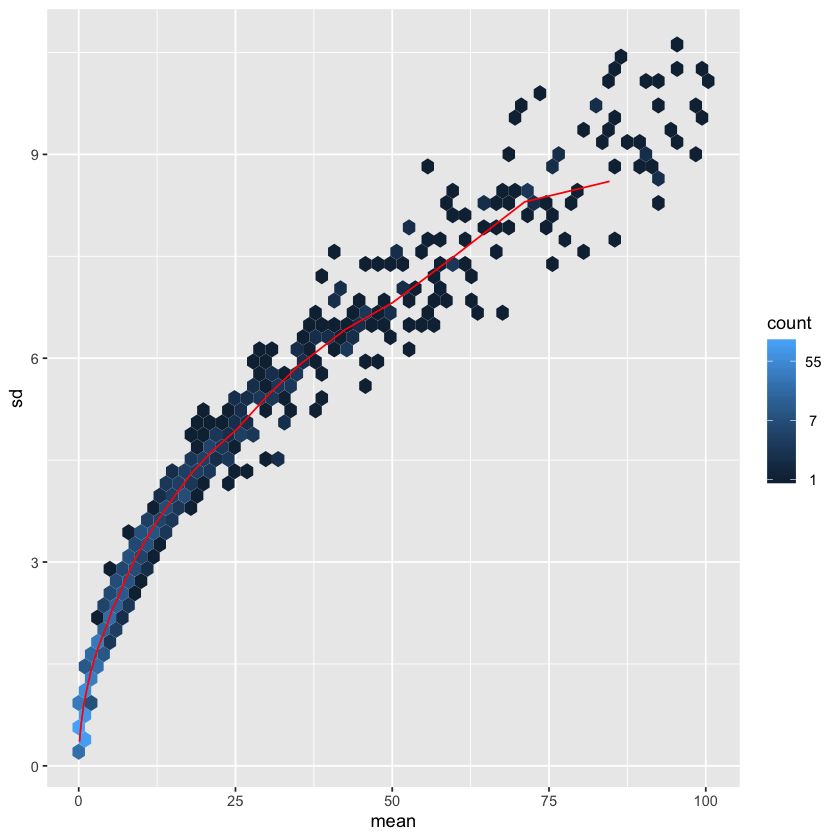

In [61]:
lambda <- 10^seq(from = -1, to = 2, length = 1000)
cts <- matrix(rpois(1000*100, lambda), ncol = 100)
meanSdPlot(cts, ranks = FALSE)

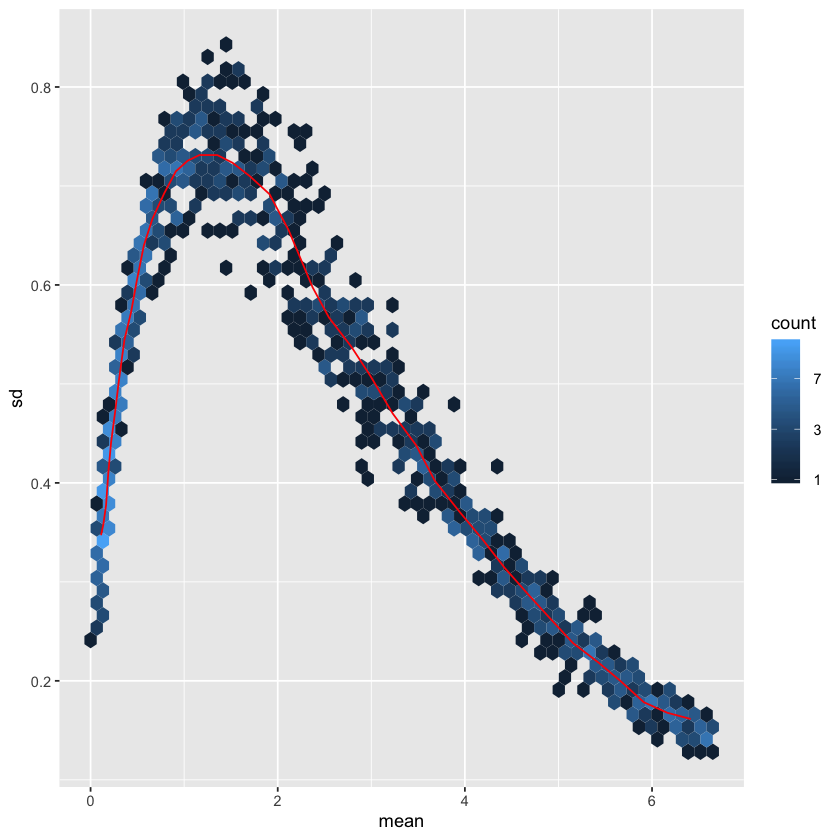

In [62]:
log.cts.one <- log2(cts + 1)
meanSdPlot(log.cts.one, ranks = FALSE)